# Glass Classification Project

## Problem Statement

- To predict the type of glass based on attributes of metal oxide concentrations.

### Attribute Information:

1. Id number: 1 to 214 (removed from CSV file)
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron


### Type of glass: (class attribute)

- 1 building_windows_float_processed
- 2 building_windows_non_float_processed
- 3 vehicle_windows_float_processed
- 4 vehicle_windows_non_float_processed (none in this database)
- 5 containers
- 6 tableware
- 7 headlamps

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report


import warnings
warnings.filterwarnings("ignore")
import joblib

In [2]:
df = pd.read_csv("glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
# dataset stats
df.shape

(214, 10)

In [5]:
# checking for null values
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
# Duplicate removal
df.drop_duplicates(inplace=True)

In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# Distribution

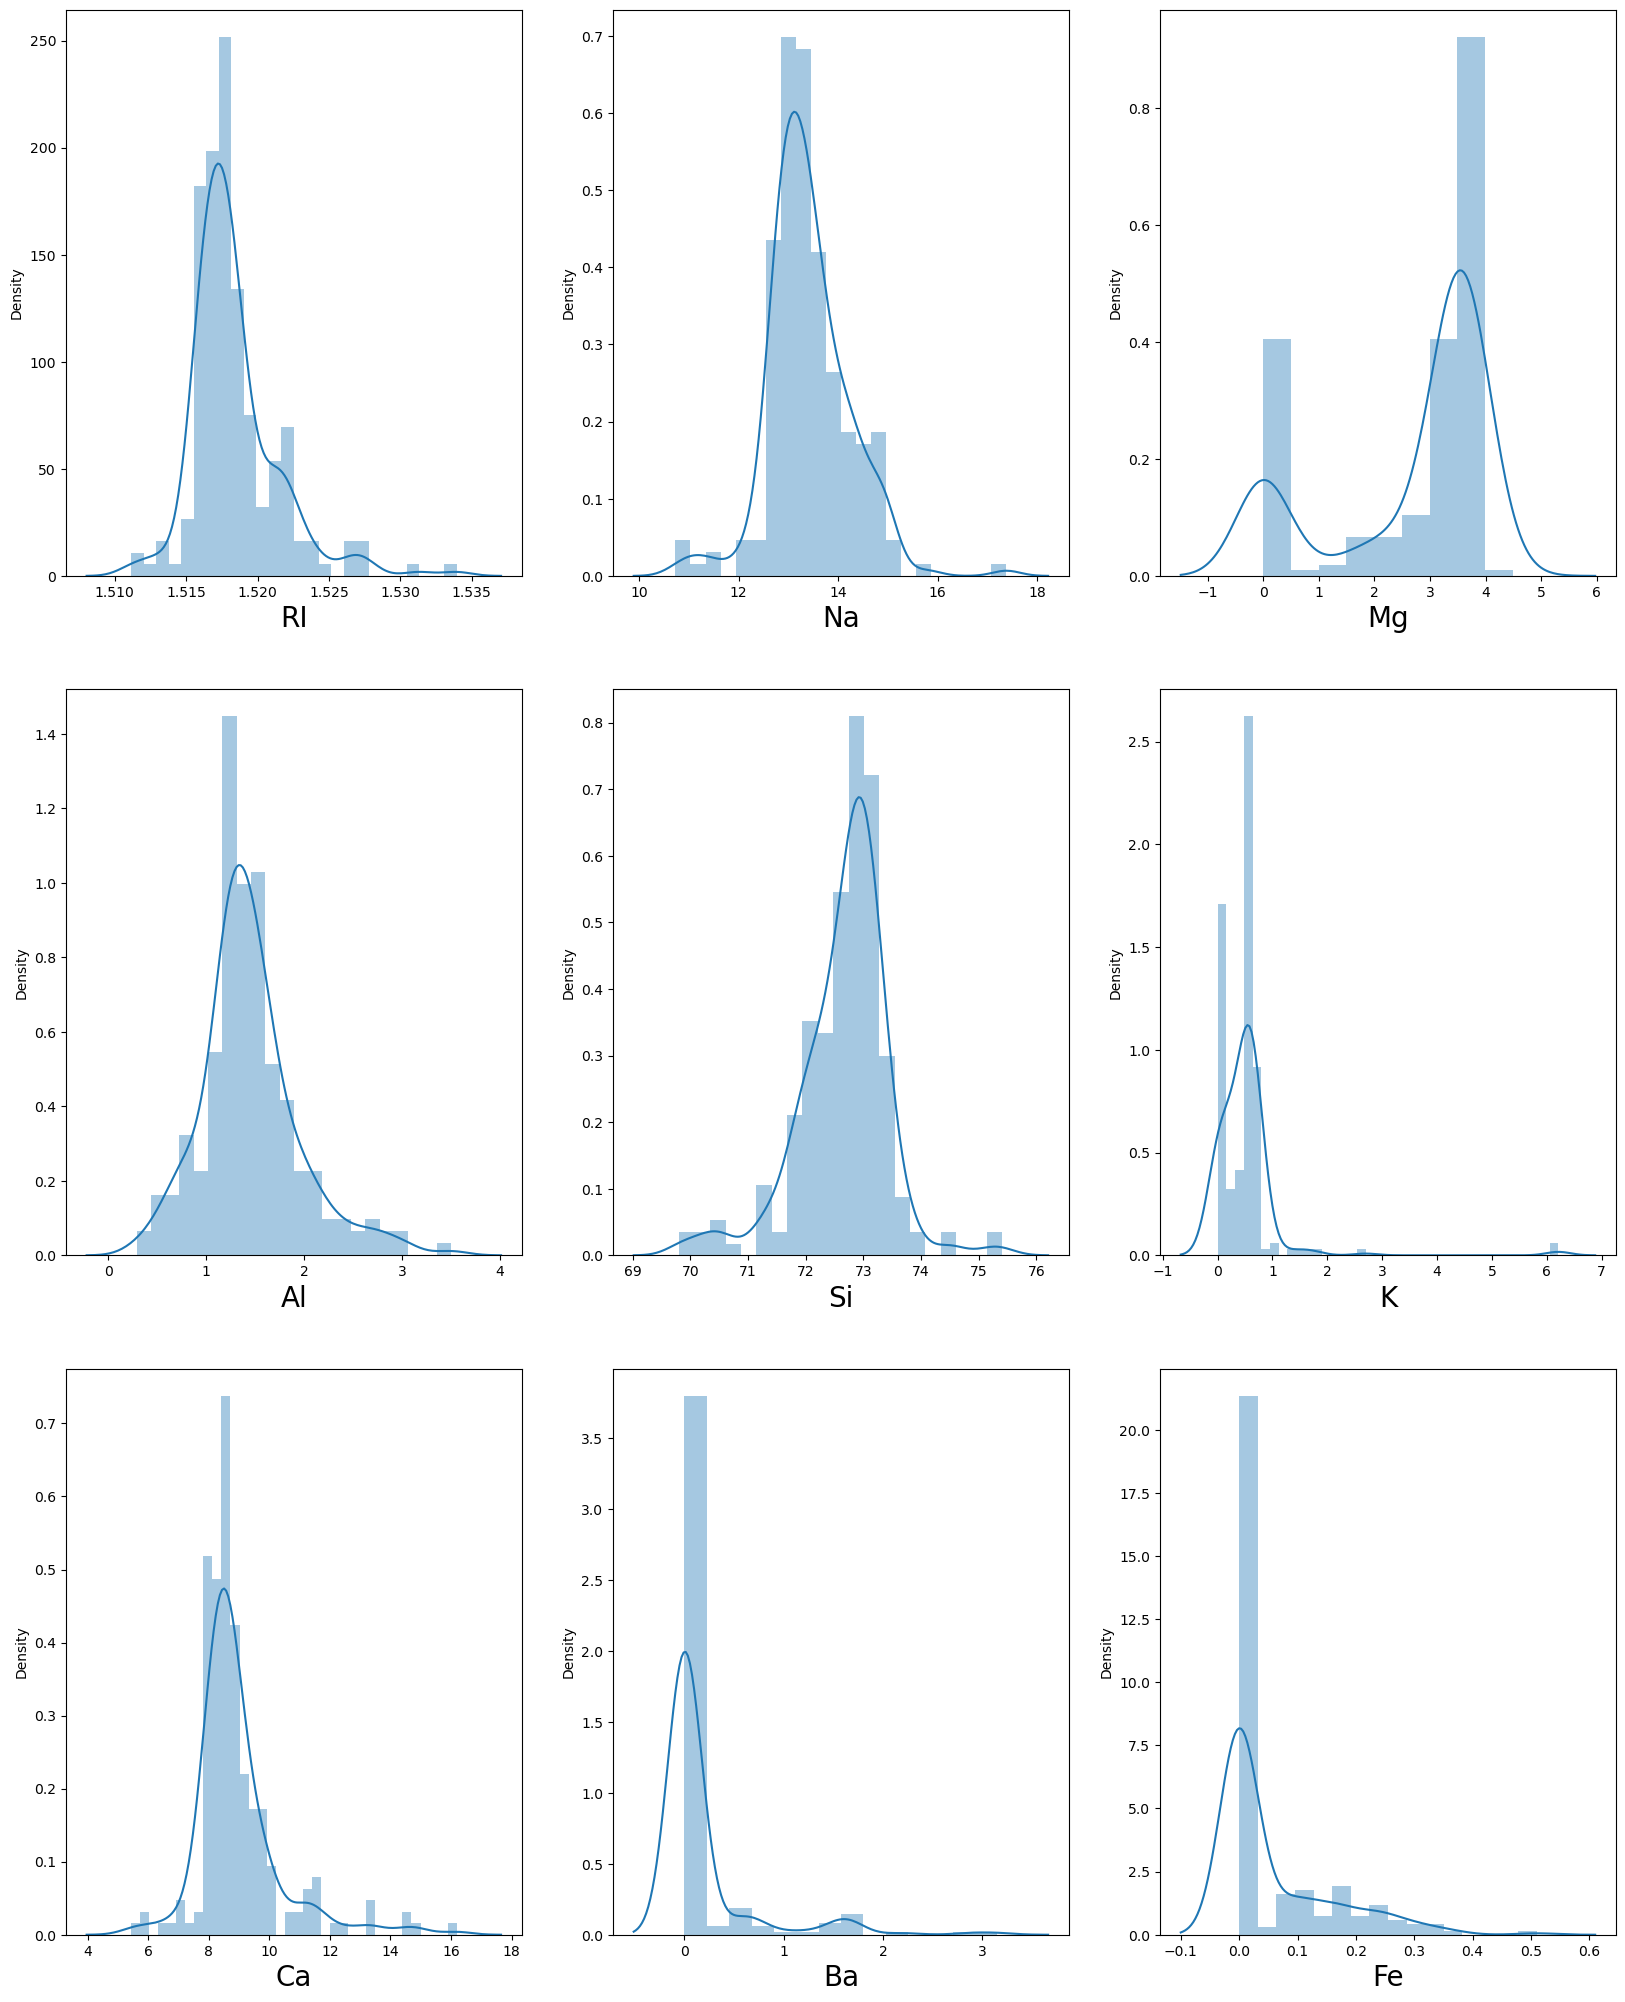

In [8]:
# checking for distribution in columns

plt.figure(figsize=(20,25))
plotnumber = 1

for column in df:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber += 1
plt.show()

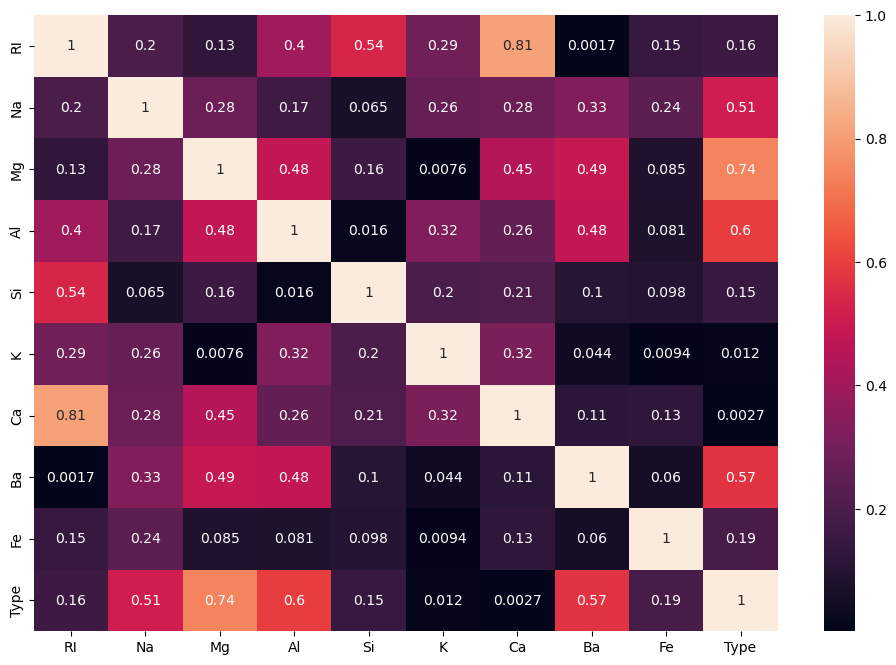

In [9]:
dff_corr = df.corr().abs()  # This will get the coefficient of one variable vs all other variable(Relationship)

plt.figure(figsize =(12,8))
sns.heatmap(dff_corr, annot = True, annot_kws ={'size':10})
plt.show()

Seems like RI and Ca are correlated as per above heat map. But we need more proof.

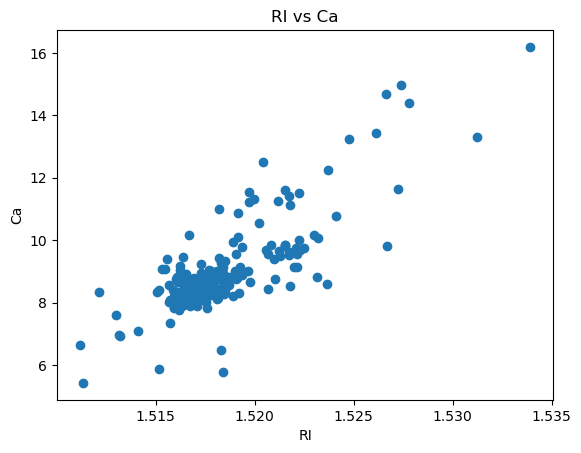

In [10]:
plt.scatter(df.RI, df.Ca)
plt.xlabel('RI')
plt.ylabel('Ca')
plt.title('RI vs Ca')
plt.show()

We see clear trend. As and when Alcohol level increases its content also increasing. So we can delete one of them.

In [11]:
x = df.drop(columns= ['Type', 'Ca'])
y = df['Type']

In [12]:
scaler=StandardScaler()
x_scaled = scaler.fit_transform(x)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=42)

In [14]:
def metric_score(clf, x_train,x_test,y_train,y_test, train = True):
    if train:
        train_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        
        print(f"Accuracy Score: {accuracy_score(y_train,train_pred) * 100:.2f}%")
        
    elif train == False:
        test_pred = clf.predict(x_test)
        
        print('\n===============Test Result================')
        print(f"Accuracy Score: {accuracy_score(y_test,test_pred) * 100: .2f}%")
        
        print('\n \n test Classification report \n', classification_report(y_test, test_pred,digits = 2))

In [15]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

KNeighborsClassifier()

In [16]:
# Call the function and pass dataset to check train and test score

metric_score(knn,x_train,x_test,y_train,y_test,train = True)  # This is for training score

metric_score(knn,x_train,x_test,y_train,y_test,train = False) # This is for testing score


===============Train Result===============
Accuracy Score: 74.21%

===============Test Result================
Accuracy Score:  68.52%

 
 test Classification report 
               precision    recall  f1-score   support

           1       0.60      0.92      0.73        13
           2       0.70      0.73      0.71        22
           3       0.00      0.00      0.00         4
           5       0.33      0.33      0.33         3
           6       1.00      0.33      0.50         3
           7       1.00      0.78      0.88         9

    accuracy                           0.69        54
   macro avg       0.60      0.52      0.52        54
weighted avg       0.67      0.69      0.66        54



### Let's Tune the parameters using GridSearchCV

In [17]:
param_grid = {'algorithm' : ['kd_tree', 'brute'],
              'leaf_size' : [3,5,6,7],
              'n_neighbors' : [3,5,7,9,11]}

gridsearch = GridSearchCV(estimator = knn, param_grid = param_grid)

gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7],
                         'n_neighbors': [3, 5, 7, 9, 11]})

In [18]:
best_params = gridsearch.best_params_
print(best_params)

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 7}


In [19]:
knn = gridsearch.best_estimator_

knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=7)

In [20]:
metric_score(knn,x_train,x_test,y_train,y_test,train = True)  # This is for training score

metric_score(knn,x_train,x_test,y_train,y_test,train = False) # This is for testing score


===============Train Result===============
Accuracy Score: 69.18%

===============Test Result================
Accuracy Score:  68.52%

 
 test Classification report 
               precision    recall  f1-score   support

           1       0.62      1.00      0.76        13
           2       0.71      0.77      0.74        22
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       1.00      0.78      0.88         9

    accuracy                           0.69        54
   macro avg       0.39      0.43      0.40        54
weighted avg       0.60      0.69      0.63        54

